In [71]:
#This is a Jupyter notebook that analyzes important variables and insights into making a successful movie 

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls data/zippedData

bom.movie_gross.csv.gz                imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz               rotten_tomatoes_critic_reviews.csv.gz
imdb.title.akas.csv.gz                rotten_tomatoes_movies.csv.gz
imdb.title.basics.csv.gz              tmdb.movies.csv.gz
imdb.title.crew.csv.gz                tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [25]:
df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz', index_col = 'tconst') #data on titles of movies
df2 = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz', index_col = 'tconst') #data on title and ratings
df3 = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz') #data on domestic and gross income of movies
merge_df = df.merge(df2, how = 'right', left_index = True, right_index = True)
merge_df = merge_df.merge(df3, how = 'right', left_on = 'primary_title', right_on = 'title') #mergeing of 3 df

merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    3027 non-null   object 
 1   original_title   3027 non-null   object 
 2   start_year       3027 non-null   float64
 3   runtime_minutes  2980 non-null   float64
 4   genres           3020 non-null   object 
 5   averagerating    3027 non-null   float64
 6   numvotes         3027 non-null   float64
 7   title            3815 non-null   object 
 8   studio           3810 non-null   object 
 9   domestic_gross   3782 non-null   float64
 10  foreign_gross    2311 non-null   object 
 11  year             3815 non-null   int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 387.5+ KB


In [45]:
merge_df = merge_df[['primary_title', 'averagerating', 'numvotes', 'domestic_gross', 'foreign_gross']]
merge_df['foreign_gross'] = merge_df['foreign_gross'].transform(lambda x : float(str(x).replace(',','')))
merge_df['gross'] = merge_df ['domestic_gross'] + merge_df ['foreign_gross']
merge_df.drop(['domestic_gross','foreign_gross'], axis = 1, inplace = True) 

#merging df and adding domestic and foreign income to create one total gross income for the movies



KeyError: "['domestic_gross', 'foreign_gross'] not in index"

In [48]:
merge_df.dropna(axis = 0, inplace = True)
merge_df              #merged with important key variables for analysis 

,primary_title,averagerating,numvotes,gross
0,The Legend of Hercules,4.2,50352.0,61200000.0
1,Baggage Claim,5.1,8296.0,22487000.0
3,Moneyball,7.6,326657.0,110200000.0
4,Hereafter,6.5,87288.0,105200000.0
5,Mission: Impossible - Ghost Protocol,7.4,428142.0,694700000.0
...,...,...,...,...
3010,The Past,7.4,54.0,10600000.0
3014,Resident Evil: The Final Chapter,5.6,74979.0,312200000.0
3015,Game Night,7.0,163279.0,117700000.0
3021,Finding Fanny,5.8,5841.0,7716000.0


In [50]:
merge_df.describe() #describes our merged model with descriptive statistics 

,averagerating,numvotes,gross
count,1810.000000,1.810000e+03,1.810000e+03
mean,6.450055,9.461844e+04,1.287922e+08
std,1.011576,1.527801e+05,2.085336e+08
min,1.600000,5.000000e+00,1.080000e+04
25%,5.900000,5.288000e+03,1.001450e+07
50%,6.500000,3.793550e+04,4.813350e+07
75%,7.175000,1.136005e+05,1.489000e+08
max,9.200000,1.841066e+06,1.405400e+09


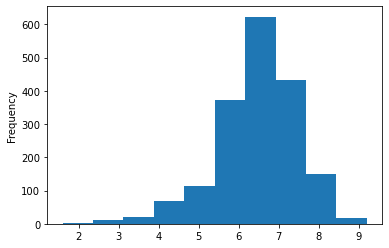

In [52]:
merge_df['averagerating'].plot.hist()

In [61]:
bool_array= merge_df['averagerating']>=6.5
bool_array                                      

#boolean function to pull the movies with the highest rating as per the histogram about >= 6.5 

0       False
1       False
3        True
4        True
5        True
        ...  
3010     True
3014    False
3015     True
3021    False
3025     True
Name: averagerating, Length: 1810, dtype: bool

In [75]:
top_ratings= merge_df[bool_array]['primary_title']
top_movies = df[df['primary_title'].isin(top_ratings)]
top_movies_wrate= top_movies.merge(merge_df, how = 'left', on = 'primary_title')
top_movies_wrate

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,gross
0,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,188100000.0
1,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,53200000.0
2,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,652301019.4
3,Spy,Spy,2011,110.0,"Action,Crime,Drama",7.0,213908.0,235600000.0
4,Spy,Spy,2011,110.0,"Action,Crime,Drama",6.6,78.0,235600000.0
...,...,...,...,...,...,...,...,...
2170,Gold,Tala,2019,NaN,Drama,7.4,9361.0,14900000.0
2171,Unstoppable,Unstoppable,2019,84.0,Documentary,6.8,173019.0,167800000.0
2172,Unstoppable,Unstoppable,2019,84.0,Documentary,6.5,576.0,167800000.0
2173,Unstoppable,Unstoppable,2019,84.0,Documentary,4.3,551.0,167800000.0


In [69]:
top_movies['start_year'].mean()    # mean average for start year for top movies 

2013.8052256532067

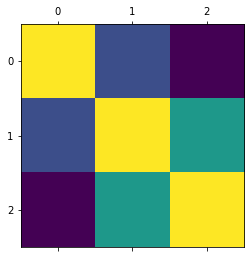

In [73]:
plt.matshow(merge_df.corr())     # analyzing the correlations between variables in notebook 

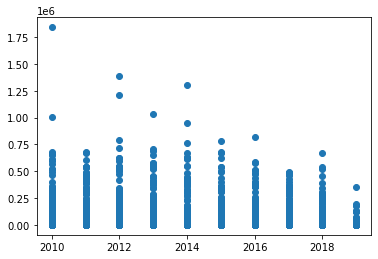

In [77]:
fig, ax = plt.subplots()
ax.scatter(top_movies_wrate['start_year'],top_movies_wrate['numvotes'])    

#scatter plot showing num of votes and start year. As observed there is an outlier for num of votes in 2010. 

1